# Linear Discriminant Analysis (LDA)

Linear discriminant analysis is a classifier with a linear decision boundary,
it does so by fitting class conditional densities to the data using Bayes'
rule. Assumes:

- Each class a Gaussian density
- All classes share the same covariance matrix $\Sigma$

\begin{align}
  p(y = k | x)
    &= \dfrac{p(x | y = k) \; p(y = k)}{p(x)} \\
    &= \dfrac{ p(x | y = k) \; p(y = k)}
        {\sum_{l} p(x | y = l) p(y = l)}
\end{align}

\begin{align}
  p(x | y = k) =
    \dfrac{1}{(2 \pi)^{d/2} \; \left| \Sigma \right|^{\frac{1}{2}}}
    \enspace
    \exp
    \left(
      -\dfrac{1}{2}
      (x - \mu_{k})^{T}
      \Sigma^{-1}_{k}
      (x - \mu_{k})
    \right)
\end{align}

\begin{align}
  \log \left( p(y = k | x) \right)
  &=
  \log \left( \dfrac{p(x | y = k) \; p(y = k)}{p(x)} \right)
  \\
  &=
  \log \left( p(x | y = k) \right)
  + \log \left( p(y = k) \right)
  - \log \left( p(x) \right)
\end{align}


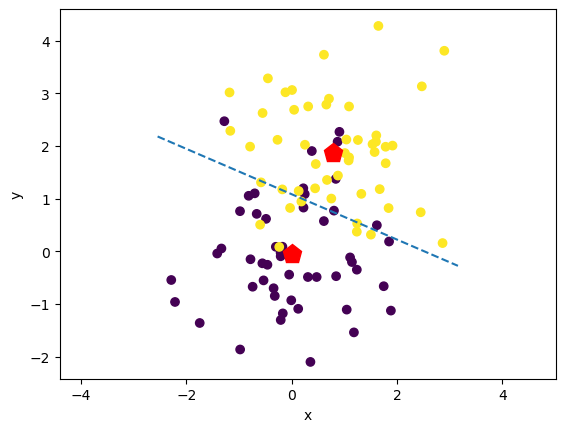

In [2]:
import numpy as np
from numpy import pi
from numpy import log
from numpy.linalg import inv
from numpy.linalg import det
import matplotlib.pyplot as plt


def generate_data():
  """Generate two groups of data with different means by same covariance"""
  mu1 = [0, 0]
  mu2 = [1, 2]
  cov = [[1, 0], [0, 1]]
  n1 = 50
  n2 = 50
  n = n1 + n2
  x1 = np.random.multivariate_normal(mean=mu1, cov=cov, size=n1)
  x2 = np.random.multivariate_normal(mean=mu2, cov=cov, size=n2)
  x = np.vstack([x1, x2])
  y = np.concatenate([np.repeat(1, n1), np.repeat(2, n2)])
  return x1, x2, x, y, n1, n2, n


def log_likelihood(x, mu, sigma, prior):
  """Log likelihood """
  r = x - mu
  cov_inv = inv(sigma)
  cov_det = det(sigma)
  return -0.5 * log(2 * pi * cov_det) - 0.5 * (r.T @ cov_inv @ r) + log(prior)


def abline(slope, intercept):
  """Plot a line from slope and intercept"""
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = slope * x_vals + intercept
  plt.plot(x_vals, y_vals, '--')


if __name__ == "__main__":
  # Generate Data
  x1, x2, x, y, n1, n2, n = generate_data()

  # Estimate priors
  pi_hat_1 = n1 / n
  pi_hat_2 = n2 / n

  # Estimate means
  mu_hat_1 = 1 / n1 * np.sum(x1, axis=0)
  mu_hat_2 = 1 / n2 * np.sum(x2, axis=0)

  # Estimate sample covariance
  cov_hat_1 = 1 / (n1 - 1) * ((x1 - mu_hat_1).T @ (x1 - mu_hat_1))
  cov_hat_2 = 1 / (n2 - 1) * ((x2 - mu_hat_2).T @ (x2 - mu_hat_2))
  cov_hat = (cov_hat_1 + cov_hat_2) / 2

  # Calculate log-liklihood
  grid = np.mgrid[-10:10.1:0.5, -10:10.1:0.5].reshape(2, -1).T
  ll_vals_1 = [log_likelihood(x, mu_hat_1, cov_hat, pi_hat_1) for x in grid]
  ll_vals_2 = [log_likelihood(x, mu_hat_2, cov_hat, pi_hat_2) for x in grid]

  # Slope
  cov_inv = inv(cov_hat)
  slope_vec = cov_inv @ (mu_hat_1 - mu_hat_2)
  slope = -slope_vec[0] / slope_vec[1]

  # Intercept
  intercept_partial = log(pi_hat_2 / pi_hat_1) + 0.5 * (
      mu_hat_1.T @ cov_inv @ mu_hat_1) - 0.5 * (mu_hat_2.T @ cov_inv @ mu_hat_2)
  intercept = intercept_partial / slope_vec[1]

  # plotting
  plt.figure()
  plt.scatter(x[:, 0], x[:, 1], c=y)
  abline(slope, intercept)
  plt.plot(mu_hat_1[0], mu_hat_1[1], 'rp', markersize=14)
  plt.plot(mu_hat_2[0], mu_hat_2[1], 'rp', markersize=14)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.axis("equal")

  plt.show()